# Create Sentinel 2 time series for Questa Tailings area

In [1]:
# Import libraries
import os
import datetime
from datetime import date
import configparser
import copy

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Import custom module for this project
from vegrestoretools import FisToDataframe, EvalScripts, FisClean

from sentinelhub import SHConfig, FisRequest, BBox, Geometry, CRS, WcsRequest, CustomUrlParam, \
    DataCollection, HistogramType
from sentinelhub.time_utils import iso_to_datetime, parse_time

In [2]:
# Read SentinelHub configuration ID's from your local ini file
config_ini = configparser.ConfigParser()
config_ini.read('sentinel2_setup.ini')

# Populate a SentinelHub configuration object with the ID's from the local ini file
config = SHConfig()
config.instance_id = config_ini['Config']['instance_id'] # Instance ID for the Configuration
config.sh_client_id = config_ini['Config']['sh_client_id'] # Credentials from the OAuth client
config.sh_client_secret = config_ini['Config']['sh_client_secret']
config.save()

In [3]:
# Other parameters
startDate = '2017-01-01'

In [5]:
# Set working directory
os.chdir(os.path.join('E:/',
                      'McKinley'))

## Open the AOI's

## Run SentinelHub Statistical Info Service (FIS) query

In [6]:
seeding_aois = mckinley_seeding_subset_PARlo

# Convert seeding polygons to WGS84
seeding_aois = seeding_aois.to_crs("EPSG:4326")

# Explode multipolygons to polygons to query with FIS request
seeding_aois_exploded = seeding_aois.explode()

# Create empty list to store results for all polygons
output_list = []

# Loop over each polygon
for index, row in seeding_aois_exploded.iterrows():

    # Status message
    print('Now processing Seeding Unit Index: ' + str(index[0]))

    # Setup parameters for FIS request
    geometry_list = Geometry(row.geometry, CRS.WGS84)
    time_interval = (startDate, date.today())

    # Retrieve custom script to pass to SentinelHub from vegrestoretools module
    evalscript = EvalScripts('Sentinel_2_NDVI')

    # Build FIS request
    fis_request = FisRequest(
        data_collection=DataCollection.SENTINEL2_L2A,
        layer='BANDS-S2-L2A',
        geometry_list=[geometry_list],
        time=time_interval,
        resolution='100m',
        custom_url_params={CustomUrlParam.EVALSCRIPT: evalscript},
        config=config
    )

    # Run the FIS request
    fis_data = fis_request.get_data()

    # Convert the FIS result to a dataframe
    fis_df = FisToDataframe(fis_data)

    # Add the seeding unit ID to the dataframe
    fis_df['ID'] = index[0]

    # Append the df to the temporary list
    output_list.append(fis_df)

# Concatenate the VMU results into a single DF
fis_df_all_raw = pd.concat(output_list, axis=0)
fis_df_all_raw

Now processing Seeding Unit Index: 172
Now processing Seeding Unit Index: 816
Now processing Seeding Unit Index: 913
Now processing Seeding Unit Index: 913
Now processing Seeding Unit Index: 916
Now processing Seeding Unit Index: 1265
Now processing Seeding Unit Index: 1314
Now processing Seeding Unit Index: 1319
Now processing Seeding Unit Index: 1558
Now processing Seeding Unit Index: 1588
Now processing Seeding Unit Index: 1589
Now processing Seeding Unit Index: 1590
Now processing Seeding Unit Index: 1594
Now processing Seeding Unit Index: 1601
Now processing Seeding Unit Index: 1608
Now processing Seeding Unit Index: 1655
Now processing Seeding Unit Index: 2335
Now processing Seeding Unit Index: 2569
Now processing Seeding Unit Index: 2577
Now processing Seeding Unit Index: 2581
Now processing Seeding Unit Index: 2584
Now processing Seeding Unit Index: 2586
Now processing Seeding Unit Index: 2587
Now processing Seeding Unit Index: 2599
Now processing Seeding Unit Index: 2600
Now p

date       min       max      mean     stDev  clm_mean    snw_mean  \
0    2021-05-31 -0.011235 -0.003757 -0.008904  0.003023       1.0  100.500000   
1    2021-05-29  0.097798  0.131056  0.108121  0.013485       0.0    0.000000   
2    2021-05-26  0.040423  0.070128  0.054129  0.011546       1.0    0.000000   
3    2021-05-24  0.093460  0.145264  0.110174  0.020601       0.0    0.000000   
4    2021-05-21 -0.009225  0.016267  0.004830  0.009395       1.0    0.250000   
..          ...       ...       ...       ...       ...       ...         ...   
536  2017-02-21  0.097730  0.149043  0.116268  0.010677       0.0    0.000000   
537  2017-02-14 -0.015393  0.025167  0.001644  0.007732       1.0    0.000000   
538  2017-02-04 -0.076547  0.513308  0.031470  0.118355       0.0   36.900000   
539  2017-02-01 -0.057969  0.070926 -0.026381  0.030557       0.0   83.100000   
540  2017-01-25 -0.057325  0.026265 -0.013573  0.020576       0.5   62.833333   

       ID  
0     172  
1     172  
2     172  
3     172  
4     172  
..    ...  
536  2650  
537  2650  
538  2650  
539  2650  
540  2650  

[24345 rows x 8 columns]

## Clean up the FIS results

In [7]:
fis_df_all = FisClean(fis_df_all_raw)
fis_df_all

ID       min       max      mean     stDev  clm_mean  snw_mean
date                                                                        
2017-02-21   172  0.105520  0.180918  0.127385  0.031246       0.0       0.0
2017-03-13   172  0.088841  0.165789  0.112921  0.030896       0.0       0.0
2017-04-12   172  0.075881  0.194825  0.120009  0.046784       0.0       0.0
2017-04-15   172  0.080686  0.205191  0.128965  0.048003       0.0       0.0
2017-04-22   172  0.073243  0.204739  0.124583  0.051938       0.0       0.0
...          ...       ...       ...       ...       ...       ...       ...
2021-05-11  2650  0.087706  0.139262  0.117857  0.012438       0.0       0.0
2021-05-14  2650  0.101309  0.155668  0.132854  0.013285       0.0       0.0
2021-05-16  2650  0.093609  0.151339  0.128688  0.012489       0.0       0.0
2021-05-24  2650  0.108791  0.159324  0.139050  0.012475       0.0       0.0
2021-05-29  2650  0.094639  0.142974  0.127912  0.011766       0.0       0.0

[9856 rows x 7 columns]

## Plot the results

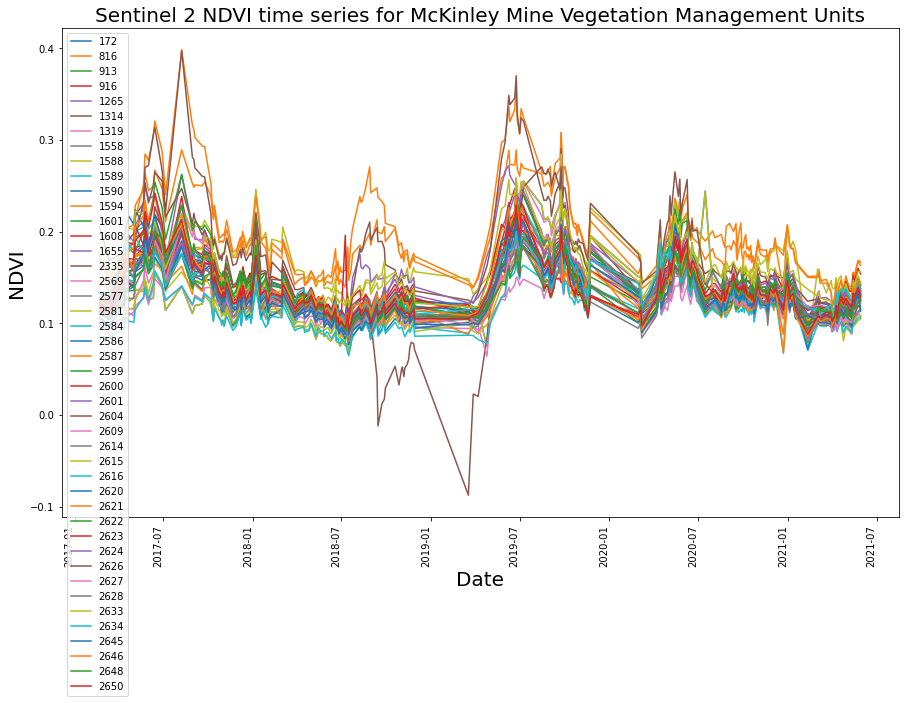

In [8]:
# Setup plot
fig, ax = plt.subplots(figsize=(15, 10))

# Build list of unique sites for legend
sites = fis_df_all.ID.unique()

fis_df_all.reset_index().groupby('ID').plot(x='date', y='mean', ax=ax)

# Legend and labels
plt.legend(sites)

plt.xlabel("Date", fontsize=20)
plt.ylabel("NDVI", fontsize=20)

ax.set_title(
    "Sentinel 2 NDVI time series for McKinley Mine Vegetation Management Units", fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

## Make DF tables consistent between Sentinel 2 and Landsat 8 data

In [9]:
sentinel_2_time_series = copy.deepcopy(fis_df_all)

# Drop columns
sentinel_2_time_series.drop(columns=['min', 'max', 'stDev', 'clm_mean', 'snw_mean'], inplace=True)

# Rename columns
sentinel_2_time_series.rename(
                columns={"mean": 'MeanNdvi'}, inplace=True)

sentinel_2_time_series.rename(
                columns={"ID": 'SuId'}, inplace=True)


sentinel_2_time_series

SuId  MeanNdvi
date                      
2017-02-21   172  0.127385
2017-03-13   172  0.112921
2017-04-12   172  0.120009
2017-04-15   172  0.128965
2017-04-22   172  0.124583
...          ...       ...
2021-05-11  2650  0.117857
2021-05-14  2650  0.132854
2021-05-16  2650  0.128688
2021-05-24  2650  0.139050
2021-05-29  2650  0.127912

[9856 rows x 2 columns]

## Save the DF for use in subsequent notebooks

In [10]:
%store sentinel_2_time_series

Stored 'sentinel_2_time_series' (DataFrame)
